In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORT DATA SET

In [36]:
dataset = pd.read_csv('C:/Users/ThinkPad/Data-Science/Air-quality-dataset/PRSA_Data_20130301-20170228/Employee.csv') 
X = dataset.iloc[:, [2, 3]].values 
y = dataset.iloc[:, -1].values

# SPLITTING THE DATA SET INTO DATA TRAINING AND DATA TESTING

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling 

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
X_train = sc. fit_transform(X_train)
X_test = sc. transform(X_test)

# Training the Naive Bayes model on the Training set


In [39]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() 
classifier.fit(X_train, y_train)

GaussianNB()

# Predicting the Test set results


In [40]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred)
print(cm)

[[653 118]
 [314  79]]


# Visualising the Training set results


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_15600\3949756463.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter (X_set[y_set == j, 0], X_set[y_set == j, 1],


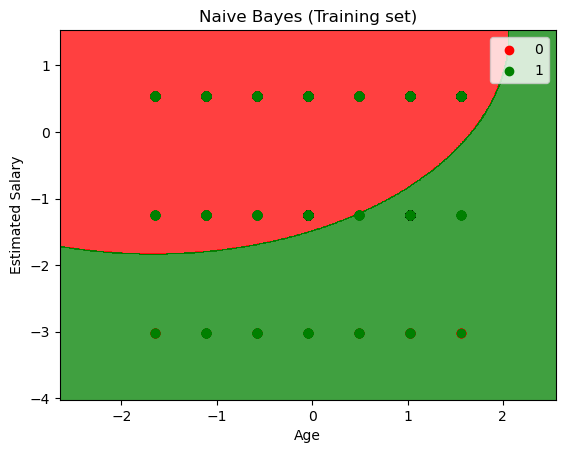

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid (np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1. shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique (y_set)):
    plt.scatter (X_set[y_set == j, 0], X_set[y_set == j, 1], 
                 c = ListedColormap (('red', 'green')) (i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_15600\3656941273.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter (X_set[y_set == j, 0], X_set[y_set ==j, 1],


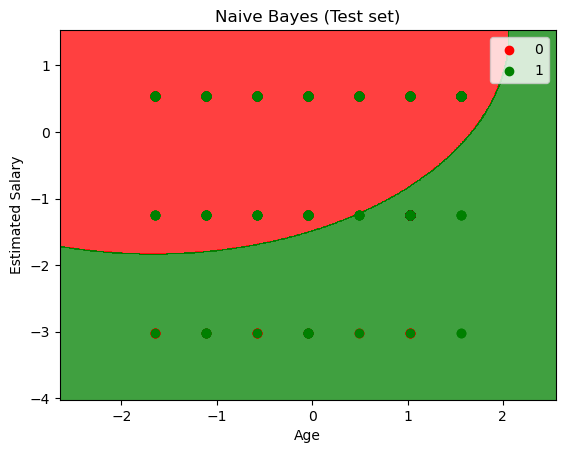

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid (np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                      np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max()+ 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim (X2.min(), X2.max())
for i, j in enumerate (np. unique (y_set)):
    plt.scatter (X_set[y_set == j, 0], X_set[y_set ==j, 1],
                 c = ListedColormap(('red', 'green')) (i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()